# Project 1: Naive Bayes Classifier
(by: Martin Marsal, Benedikt Allmendinger, Christian Diegmann; Heilbronn University, Germany, October 2024) 

In this notebook we will implement the Naive Bayes and use it for a data set to determine the patients' degree of sickness.

For this project the following sources were used:

To get a theoretical understanding, we used the following videos:

https://youtu.be/O2L2Uv9pdDA?si=Npoky40k9q39SRwG (Naive Bayes, Clearly Explained!!! by StatQuest with Josh Starmer)

https://youtu.be/rzFX5NWojp0?si=V3a0dzutb8p5CWdL (The Normal Distribution, Clearly Explained!!! by StatQuest with Josh Starmer)

https://youtu.be/H3EjCKtlVog?si=aUJhf6edHaAKJRRq (Gaussian Naive Bayes, Clearly Explained!!! by StatQuest with Josh Starmer)

For the coding part it was a combination of the following:

https://chatgpt.com/ (ChatGPT)

https://pandas.pydata.org/docs/ (Pandas Package Documentation)

https://docs.python.org/3/library/math.html (Math Package Documentation)

https://matplotlib.org/ (Matplotlib Package Documentation)

### Import Naive Bayes Classifier implementation

In [153]:
from naive_bayes_classifier import *

### Convert CSV File to a Pandas DataFrame

In this step, we load a CSV file into a Pandas DataFrame using the `pd.read_csv()` function. We specify the delimiter as a semicolon (`;`) since the CSV file is separated by semicolons. After loading the data, we strip any leading or trailing whitespace from the column names using the `str.strip()` method to ensure clean headers. Finally, we print the DataFrame to verify the contents.


In [154]:
# Convert csv file to a pandas DataFrame
df = pd.read_csv('inflammation_diagnosis.csv', sep=';')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the DataFrame
print(df)

     temperature nausea lumbar_pain urine_pushing micturition_pains  \
0           35.5     no         yes            no                no   
1           35.9     no          no           yes               yes   
2           35.9     no         yes            no                no   
3           36.0     no          no           yes               yes   
4           36.0     no         yes            no                no   
..           ...    ...         ...           ...               ...   
115         41.4     no         yes           yes                no   
116         41.5     no          no            no                no   
117         41.5    yes         yes            no               yes   
118         41.5     no         yes           yes                no   
119         41.5     no         yes           yes                no   

    burning_of_urethra inflammation nephritis  
0                   no           no        no  
1                  yes          yes        no  
2  

### Create 'continuous' Array

In this step, we generate a `continuous` array that indicates whether each column in the DataFrame contains continuous or discrete values. We iterate over every column in the DataFrame, excluding the label column, and check the first value of each column. If the value is 'yes' or 'no', we treat it as a discrete column, and append `False` to the `continuous` array. Otherwise, we assume the column contains continuous data and append `True`.


In [155]:
# Initialize the 'continuous' array
continuous = []

# Iterate over every column except the label column
for column in df.columns[:-1]:  
    first_value = df[column].iloc[0]
    
    # Check if the first value is discrete (yes/no)
    if first_value == 'yes' or first_value == 'no':
        continuous.append(False)
    else:  # Otherwise, it's continuous
        continuous.append(True)
        
# Print the 'continuous' array
print(continuous)

[True, False, False, False, False, False, False]


#### Different approach for the creation of 'continuous' array to be more generalised

In [156]:
# Set a threshold for unique values. If a column has fewer than x unique values, it’s likely discrete
unique_value_threshold = 10

# Determine if each column is continuous or discrete
continuous = []
for column in df.columns[:-1]:  # Exclude the label column
    if pd.api.types.is_numeric_dtype(df[column]):
        # Check the number of unique values for numeric columns
        unique_values = df[column].nunique()
        if unique_values < unique_value_threshold:
            continuous.append(False)  # Treat as discrete if unique values are below threshold
        else:
            continuous.append(True)   # Treat as continuous
    else:
        # Non-numeric columns are considered discrete
        continuous.append(False)
        
print(continuous)

[True, False, False, False, False, False, False]


### Plot the CSV

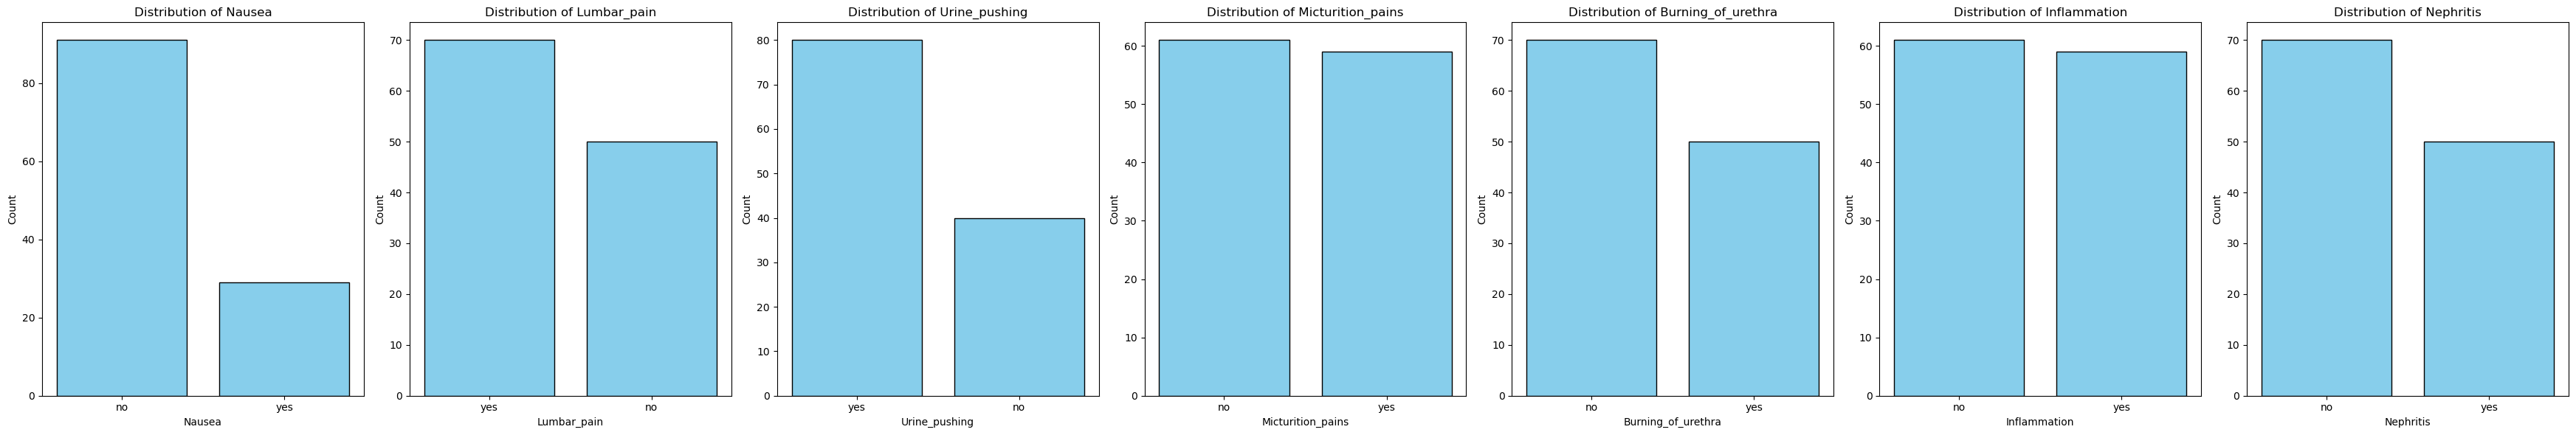

In [157]:
import matplotlib.pyplot as plt

# Identify categorical columns dynamically (in this case, 'inflammation' and 'nephritis')
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a figure dynamically for each categorical feature
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(5 * len(categorical_columns), 6))

# If there's only one categorical column, we need to ensure 'axes' is treated as a list
if len(categorical_columns) == 1:
    axes = [axes]

# Iterate over each categorical column and plot the distribution
for i, column in enumerate(categorical_columns):
    # Get the value counts for each class in the column
    value_counts = df[column].value_counts()
    
    # Plot the data
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Instantiate the NaiveBayes Class

In this step, we instantiate the `NaiveBayes` class, which will be used to perform classification. The constructor takes in the `continuous` array, which specifies which features in the dataset are continuous or discrete. This information is essential for the Naive Bayes classifier to handle the different types of data appropriately.


In [158]:
# Instantiate the NaiveBayes class, passing the continuous array
naive_bayes = NaiveBayes(continuous)

### Create 'disease' Column and Drop Unnecessary Columns

We begin by mapping the values of the 'inflammation' and 'nephritis' columns from 'yes'/'no' to `True`/`False`. Then, we define a function `classify_disease()` that categorizes each row into 'very sick', 'sick', or 'healthy' based on the values of 'inflammation' and 'nephritis'. This function is applied to each row of the DataFrame to create a new 'disease' column.

Afterward, the original 'inflammation' and 'nephritis' columns are dropped, leaving us with the 'disease' column. Finally, the 'disease' column is also dropped to create a `df_complete` DataFrame, which is printed at the end.

In [159]:
# Map 'yes'/'no' to True/False for inflammation and nephritis columns
df['inflammation'] = df['inflammation'].map({'yes': True, 'no': False})
df['nephritis'] = df['nephritis'].map({'yes': True, 'no': False})

# Apply classification function to each row
df['disease'] = df.apply(naive_bayes.classify_disease, axis=1)

# Drop the 'inflammation' and 'nephritis' columns
df = df.drop(columns=['inflammation', 'nephritis'])

df_complete = df

# Create the df_complete by dropping the 'disease' column as well
df_complete = df.drop(columns=['disease'])

# Print the final DataFrame
print(df_complete)


     temperature nausea lumbar_pain urine_pushing micturition_pains  \
0           35.5     no         yes            no                no   
1           35.9     no          no           yes               yes   
2           35.9     no         yes            no                no   
3           36.0     no          no           yes               yes   
4           36.0     no         yes            no                no   
..           ...    ...         ...           ...               ...   
115         41.4     no         yes           yes                no   
116         41.5     no          no            no                no   
117         41.5    yes         yes            no               yes   
118         41.5     no         yes           yes                no   
119         41.5     no         yes           yes                no   

    burning_of_urethra  
0                   no  
1                  yes  
2                   no  
3                  yes  
4                   no

### Plot the updated Data

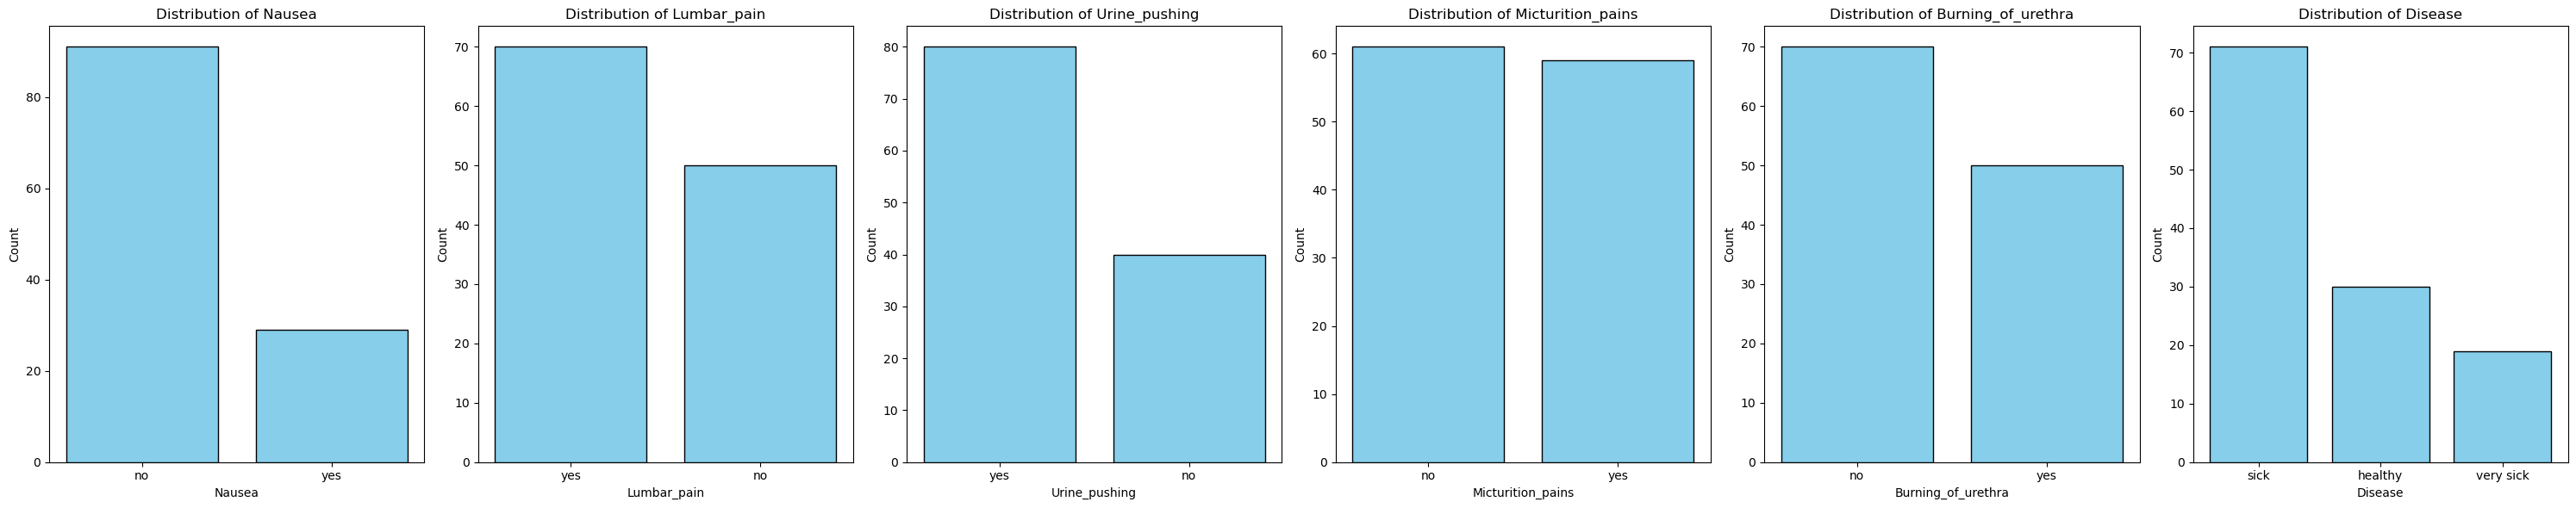

In [160]:
# Identify categorical columns dynamically (in this case, 'inflammation' and 'nephritis')
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a figure dynamically for each categorical feature
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(5 * len(categorical_columns), 6))

# If there's only one categorical column, we need to ensure 'axes' is treated as a list
if len(categorical_columns) == 1:
    axes = [axes]

# Iterate over each categorical column and plot the distribution
for i, column in enumerate(categorical_columns):
    # Get the value counts for each class in the column
    value_counts = df[column].value_counts()
    
    # Plot the data
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Randomize DataFrame and Split into Train and Test Sets

In this step, we shuffle the DataFrame using the `sample()` method with a fraction of `1` to randomize the entire dataset. We set the `random_state` to ensure reproducibility of the shuffle. After shuffling, the DataFrame is split into an 80% training set and a 20% test set. The training set is extracted from the first 80% of the shuffled DataFrame, and the test set is from the remaining 20%. Both sets are then printed to verify the split.


In [161]:
# Shuffle the DataFrame and reset the index
shuffle_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the size of the training set (80% of the data)
train_size = int(0.8 * len(shuffle_df))

# Split the DataFrame into training and test sets
train_df = shuffle_df.iloc[:train_size]
test_df = shuffle_df.iloc[train_size:]

# Print the training and test sets
print(train_df)
print(test_df)

    temperature nausea lumbar_pain urine_pushing micturition_pains  \
0          37.5     no          no           yes                no   
1          37.6     no          no           yes               yes   
2          36.0     no         yes            no                no   
3          37.9     no          no           yes               yes   
4          37.0     no          no           yes               yes   
..          ...    ...         ...           ...               ...   
91         37.2     no         yes            no                no   
92         41.2    yes         yes            no               yes   
93         37.9     no          no           yes                no   
94         38.3     no         yes           yes                no   
95         41.1    yes         yes           yes               yes   

   burning_of_urethra    disease  
0                  no       sick  
1                 yes       sick  
2                  no    healthy  
3                  

In [162]:
# Calculate the percentage of unique samples in test data and check for identical rows by index
percentage_unique_test, has_identical_rows = naive_bayes.check_data_difference(train_df, test_df)

print(f"Percentage of unique samples in test data compared to training data: {percentage_unique_test}%")
print(has_identical_rows)

Percentage of unique samples in test data compared to training data: 87.5%
There are no identical rows between train and test data based on index.


### Fit the NaiveBayes Classifier to the Training Data

We now fit the `NaiveBayes` classifier to the training dataset. The `fit()` method takes the training DataFrame (`train_df`) and the target column name (`"disease"`), which contains the labels we are trying to predict. This step trains the model by learning the underlying patterns and relationships between the features and the target variable.


In [163]:
# Define the target column name
target_name = "disease"

# Fit the NaiveBayes classifier on the training data
naive_bayes.fit(train_df, target_name)

In [164]:
print(naive_bayes.priors)

{'healthy': 0.23958333333333334, 'sick': 0.6041666666666666, 'very sick': 0.15625}


In [165]:
print(naive_bayes.likelihoods)

{'nausea': {'healthy': {'no': 1.0, 'yes': 0.0}, 'sick': {'no': 0.8793103448275862, 'yes': 0.1206896551724138}, 'very sick': {'no': 0.0, 'yes': 1.0}}, 'lumbar_pain': {'healthy': {'no': 0.30434782608695654, 'yes': 0.6956521739130435}, 'sick': {'no': 0.5862068965517241, 'yes': 0.41379310344827586}, 'very sick': {'no': 0.0, 'yes': 1.0}}, 'urine_pushing': {'healthy': {'no': 1.0, 'yes': 0.0}, 'sick': {'no': 0.1206896551724138, 'yes': 0.8793103448275862}, 'very sick': {'no': 0.0, 'yes': 1.0}}, 'micturition_pains': {'healthy': {'no': 1.0, 'yes': 0.0}, 'sick': {'no': 0.4482758620689655, 'yes': 0.5517241379310345}, 'very sick': {'no': 0.0, 'yes': 1.0}}, 'burning_of_urethra': {'healthy': {'no': 1.0, 'yes': 0.0}, 'sick': {'no': 0.41379310344827586, 'yes': 0.5862068965517241}, 'very sick': {'no': 0.5333333333333333, 'yes': 0.4666666666666667}}}


In [166]:
print(naive_bayes.gaussian_parameters)

{'temperature': {'healthy': {'mean': 38.04347826086956, 'std': 1.9399686236817273}, 'sick': {'mean': 38.37586206896552, 'std': 1.6024444424589497}, 'very sick': {'mean': 40.586666666666666, 'std': 0.4323799035019782}}}


### Predict Probabilities with NaiveBayes Classifier

After fitting the model, we can use the `predict_probability()` method to estimate the probability distribution of the target variable for each instance in the dataset. Here, we pass the `df_complete` DataFrame (which contains the features but not the target column) to the method to generate these probability predictions.


In [167]:
# Predict the probabilities for each instance in df_complete
naive_bayes.predict_probability(df_complete)

,healthy,sick,very sick,Prediction
0,9.834096e-01,0.016590,5.647434e-24,healthy
1,1.218492e-18,1.000000,1.090936e-17,sick
2,9.804388e-01,0.019561,4.389005e-24,healthy
3,1.172068e-18,1.000000,9.925933e-18,sick
4,9.796798e-01,0.020320,4.148316e-24,healthy
...,...,...,...,...
115,3.600353e-12,1.000000,5.381944e-12,sick
116,9.219734e-01,0.078027,2.483593e-24,healthy
117,2.264332e-10,0.999733,2.668598e-04,sick
118,3.707038e-12,1.000000,3.822768e-12,sick


### Separate the Last Column and Evaluate the NaiveBayes Classifier

In this step, we separate the last column of the test set into two parts: `test_data`, which contains the feature columns, and `test_labels`, which contains the true labels for the test set. We then evaluate the performance of the NaiveBayes classifier using the `evaluate_on_data()` method. This method compares the model’s predictions to the actual labels in the test set and provides an evaluation metric.

Accuracy of the NaiveBayes classifier: 100.00%
Confusion Matrix:
           healthy  sick  very sick
healthy          7     0          0
sick             0    13          0
very sick        0     0          4


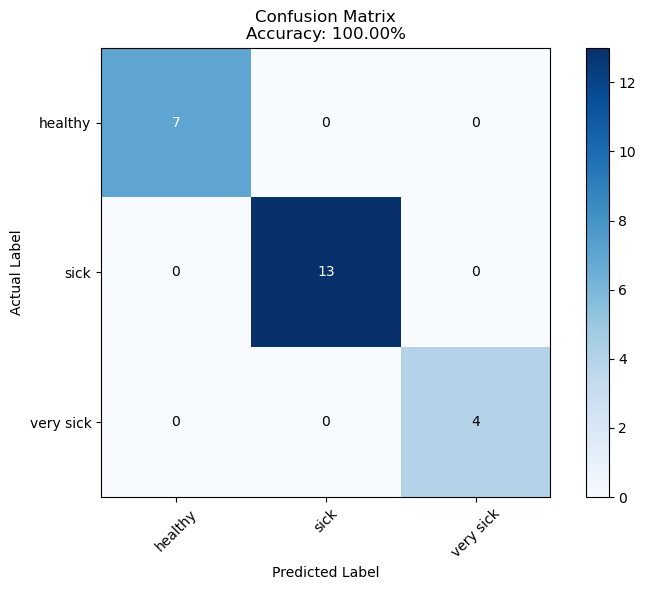

In [168]:
# Separate the features and labels in the test set
test_data = test_df.iloc[:, :-1]  # All columns except the last
test_labels = test_df.iloc[:, -1]  # The last column (target)

# Evaluate the NaiveBayes classifier and store the accuracy
accuracy, confusion_matrix = naive_bayes.evaluate_on_data(test_data, test_labels)

# Get the labels used in the confusion matrix, sorted for consistent order
labels = sorted(test_labels.unique())

# Convert the confusion matrix to a Pandas DataFrame
confusion_df = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

# Print the accuracy
print(f"Accuracy of the NaiveBayes classifier: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_df)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_df, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.colorbar()

# Setting tick marks and labels
tick_marks = range(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Adding text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        count = confusion_df.iloc[i, j]
        plt.text(j, i, str(count),
                 ha='center', va='center',
                 color='white' if confusion_df.iloc[i, j] > confusion_df.values.max()/2 else 'black')

plt.tight_layout()
plt.show()



### Visualize Data with Matplotlib

To gain more insight into the data, we will visualize it using `matplotlib`. We will create a bar plot that shows the distribution of the predicted disease categories for the test data. This visualization will help us understand how the classifier's predictions are distributed across the different disease classes.

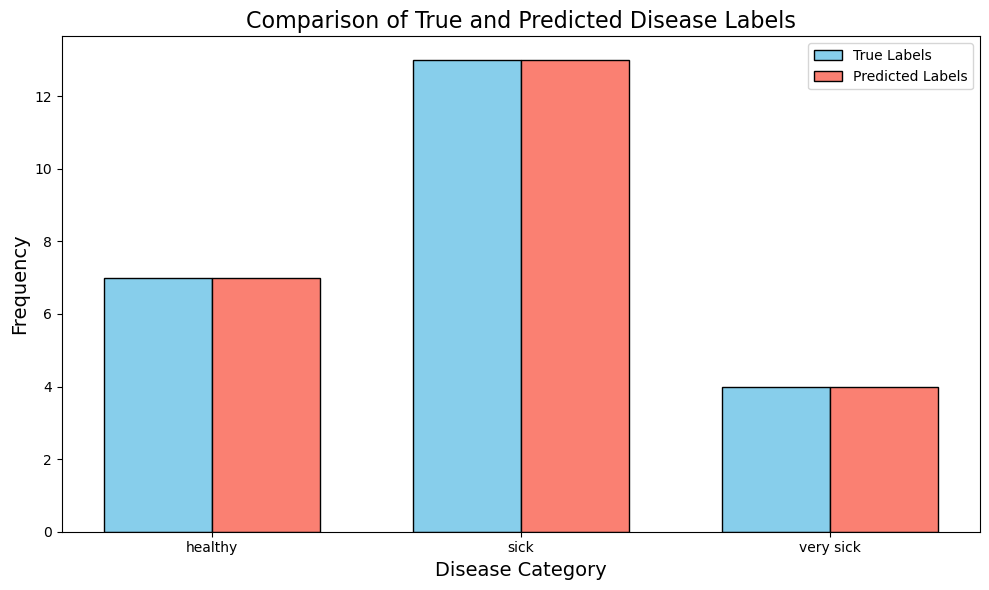

In [169]:
# Use predict_probability to get predictions and probabilities
results = naive_bayes.predict_probability(test_data)

# Extract the predicted labels from the 'Prediction' column
predicted_labels = results['Prediction']

# Reset the index of test_labels to align it with predicted_labels
true_labels = test_labels.reset_index(drop=True)

# Create a DataFrame with true labels and predicted labels
comparison_df = pd.DataFrame({'True Label': true_labels, 'Predicted Label': predicted_labels})

# Count the occurrences of each unique label in true labels and predicted labels
true_label_counts = true_labels.value_counts()
predicted_label_counts = predicted_labels.value_counts()

# Identify all unique labels to ensure both sets have the same x-axis categories
labels = sorted(set(true_labels.unique()).union(predicted_labels.unique()))
x = list(range(len(labels)))  # Label locations
width = 0.35  # Width of the bars

# Compute positions for true labels and predicted labels
x_true = [xi - width/2 for xi in x]
x_pred = [xi + width/2 for xi in x]

# Get the counts for each label, ensuring alignment with labels
true_counts = [true_label_counts.get(label, 0) for label in labels]
pred_counts = [predicted_label_counts.get(label, 0) for label in labels]

# Create a bar chart to visualize the distribution of true and predicted labels
plt.figure(figsize=(10, 6))
plt.bar(x_true, true_counts, width, label='True Labels', color='skyblue', edgecolor='black')
plt.bar(x_pred, pred_counts, width, label='Predicted Labels', color='salmon', edgecolor='black')

# Add titles and labels
plt.title('Comparison of True and Predicted Disease Labels', fontsize=16)
plt.xlabel('Disease Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
